In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio_train.csv', delimiter=';')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
data.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


1 -> Defective

0 -> Healthy

In [4]:
X = data.drop(columns='cardio', axis=1)
Y = data['cardio']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [7]:
X_train_scaled_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_scaled_prediction, Y_train)

In [8]:
print("Accuracy on training data :", training_data_accuracy)

Accuracy on training data : 0.720125


In [9]:
X_test_scaled_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_scaled_prediction, Y_test)

In [10]:
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.7207857142857143


Confusion Matrix
[[5356 1648]
 [2261 4735]]


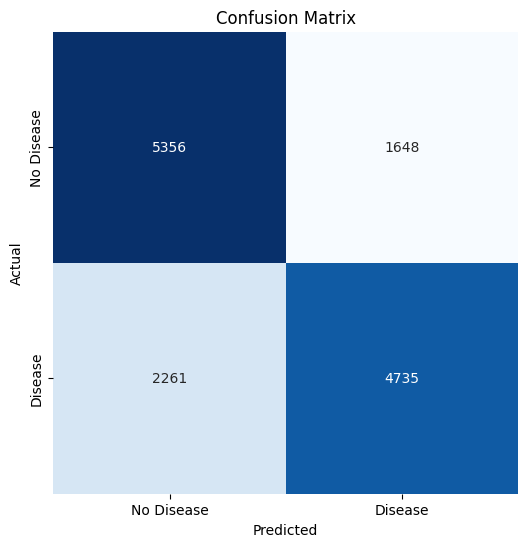

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.70      0.76      0.73      7004
     Disease       0.74      0.68      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [14]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=['No Disease', 'Disease']))

Building Predictive System

In [13]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

input_data = (1, 20228, 1, 156, 85.0, 140, 90, 3, 1, 0, 0, 1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_scaled = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_scaled)

prediction = model.predict(input_data_scaled)
if prediction[0] == 0:
    print("The person does not have Cardiovascular Disease.")
else:
    print("The person has Cardiovascular Disease.")


The person has Cardiovascular Disease.
